In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

In [3]:
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
y = np.array(y)

In [4]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

In [5]:
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))

In [6]:
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

In [7]:
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

In [8]:
def f_forward(x, w1, w2):
	z1 = x.dot(w1)
	a1 = sigmoid(z1)
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	return(a2)

In [9]:
def back_prop(x, y, w1, w2, alpha):
	z1 = x.dot(w1)
	a1 = sigmoid(z1)
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	return(w1, w2)

In [10]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()

In [11]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.06670464  0.48191426  0.20040314  0.72640411 -1.8088875 ]
 [ 1.29616475  0.57790307  1.14752913  0.69901084  0.57664962]
 [ 1.63476595 -0.28524054 -0.31711307  0.93708752  1.93349911]
 [-0.16697813 -1.11094252  1.29081686  2.0915342  -1.45867957]
 [ 0.55011198  0.15315362 -1.19641197  0.23576955  0.6322542 ]
 [ 0.04277801 -0.3449127  -0.15314496  0.68700879 -0.00767121]
 [-0.47272141  0.36171088  0.84677882 -2.61427221 -0.0396307 ]
 [ 0.88295057  0.96926172  0.36601829  0.71218419 -0.29271823]
 [ 0.82574008  1.25364017 -0.01066949 -0.06549092 -0.23846608]
 [-0.76142584  1.39717958 -0.71824455  0.74850871 -0.708471  ]
 [-1.00210029  0.8989122  -0.03807468 -1.28661987  0.0295503 ]
 [-0.16723384  0.89724896  2.58588623  0.81125404  0.00859668]
 [ 2.2685633   0.66455287 -0.56780542  1.10820668  1.47706028]
 [-1.14780136  0.75204998  1.11863684 -0.65897966  1.27376087]
 [-0.05505054 -2.24156004 -2.4209067  -0.26654347  0.75517228]
 [-0.12098959  1.18856244  0.82188614 -0.69842256 -0.88

In [12]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 67.20258955131297
epochs: 2 ======== acc: 71.05739488581786
epochs: 3 ======== acc: 73.72503641810168
epochs: 4 ======== acc: 75.68600511089318
epochs: 5 ======== acc: 77.18297354439694
epochs: 6 ======== acc: 78.3776968210916
epochs: 7 ======== acc: 79.3815909189364
epochs: 8 ======== acc: 80.26465808546152
epochs: 9 ======== acc: 81.06283290537895
epochs: 10 ======== acc: 81.78746867831518
epochs: 11 ======== acc: 82.43813037275967
epochs: 12 ======== acc: 83.01463339220159
epochs: 13 ======== acc: 83.52247248359365
epochs: 14 ======== acc: 83.97160711078601
epochs: 15 ======== acc: 84.37318752628333
epochs: 16 ======== acc: 84.73736463988574
epochs: 17 ======== acc: 85.0725458595009
epochs: 18 ======== acc: 85.38544603744383
epochs: 19 ======== acc: 85.68139653074508
epochs: 20 ======== acc: 85.96465785718705
epochs: 21 ======== acc: 86.23865002249664
epochs: 22 ======== acc: 86.50608566246501
epochs: 23 ======== acc: 86.76901765260492
epochs: 24 ======== acc

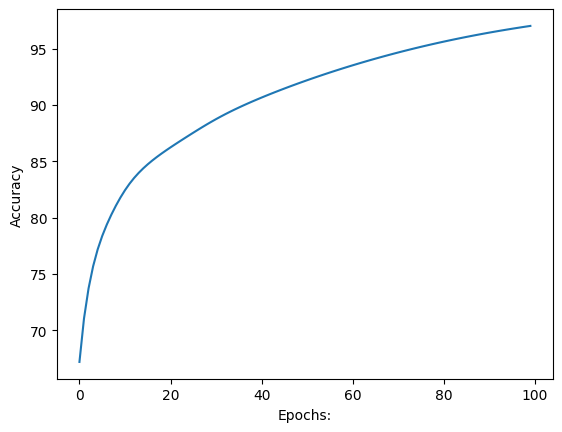

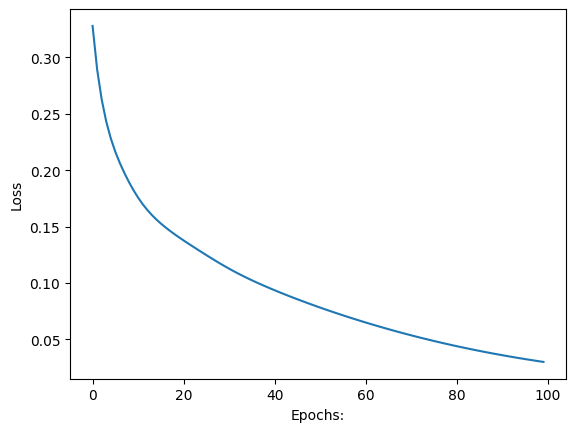

In [13]:
# accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# Loss
plt.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

In [15]:
d =[0, 1, 1, 1, 1, 0,
0, 1, 0, 1, 0, 0,
0, 1, 0, 1, 0, 0,
0, 1, 0, 1, 0, 0,
0, 1, 1, 1, 1, 0]
d = np.array(d)
d

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0])

Image is of letter B.


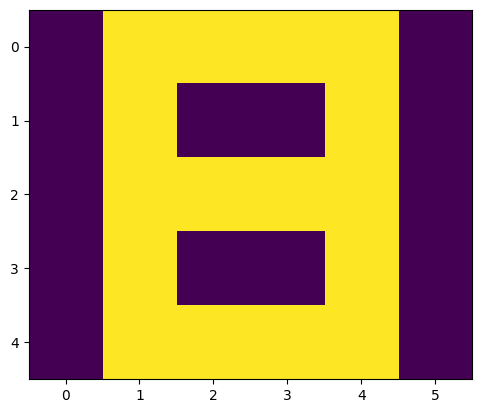

In [16]:
predict(x[1], w1, w2)